# Data Science and Bussiness Analytics Intern- The Sparks Foundation

**BATCH  - JANUARY 2022 #GRIPJANUARY2022**

**AUTHOR - KASHISH SAMEER MULLANI**

**TASK   - PREDICTION USING SUPERVISED MACHINE LEARNING** 

In this task we will use regression analysis to predict percentage of students on the basis of number of hours they study.
We will make use of Sci-kit library for this analysis.

**IMPORTING LIBRARIES AND DATA**

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn import metrics


In [2]:
#Importing the data set
url= "http://bit.ly/w-data"
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**DATA PREPROCESSING**

In [3]:
#checking number of rows and columns in data
print(data)

print("Dimensions:")
print(data.shape)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Dimensions:
(25, 2)


In [4]:
#using dataframe.describe to get statistical summary of the data
print("Statistical Summary:")
print(data.describe())

Statistical Summary:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [5]:
# checking missing values
data.isnull().values.any()

False

As the output is 'False' means there are no missing values in data.

**EXPLORATARY DATA ANALYSIS**

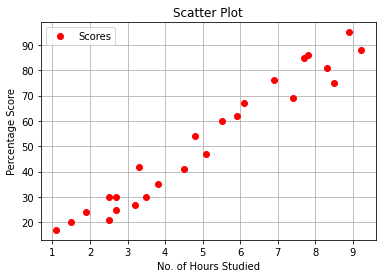

In [6]:
#plotting scatter plot

colors="Red"
data.plot(x='Hours', y='Scores', style='o', c= colors) 
plt.title('Scatter Plot')  
plt.xlabel('No. of Hours Studied') 
plt.ylabel('Percentage Score')  
plt.grid(True)
plt.show()

As we can see in above graph, as the no of hours of study increses the scores also increases. 
This shows there is **positive correlation between No. of hours of study and Percentage** obtained by students.

In [7]:
#Correlation in two attributes hours and percentage
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Correlation between no of hours of study and percentage obtained is 0.976191 which is good.**

**PREPARING DATA**

Dividing the data into input and output variable. Here **input is no. of hours of study(dependent variable) and 
output will be percentage obtained by student(independent variable)**

In [8]:
#dividing data
x=data["Hours"]
y=data["Scores"]
print("(Student)(x) \n")
print(x)
print("(Student)(y) \n")
print(y)

(Student)(x) 

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64
(Student)(y) 

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


**SPLITTING OF DATA**

We will split our data into **Training and Testing sets**

In [9]:
#dividing data into training(80%) and testing(20%) sets using train_test_split() method
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
#test size=0.2 means 20% of data is used for testing purpose


**TRAINING THE ALGORITHM**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [10]:
lm=LinearRegression()
Regression_model=lm.fit(X_train,Y_train)

#printing values of intercept and coefficient of independent variable
print("Intercept :",Regression_model.intercept_)
print("Coefficient of X:",Regression_model.coef_)

Intercept : 2.018160041434683
Coefficient of X: [9.91065648]


Training is complete

In [11]:
LR=LinearRegression()
LR.fit(X_train,Y_train)
print("Data is trained")

Data is trained


**PLOTTING REGRESSION LINE**

In [12]:
# regression line
Regression_line=Regression_model.coef_*x+Regression_model.intercept_

m=LR.coef_
c=LR.intercept_


fitted_RL=m*X+c

**VISUALIZING MODEL**

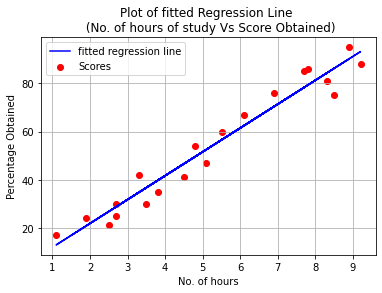

In [13]:
#plotting regression line on training set

plt.scatter(X_train,Y_train,color="Red" , label = "Scores", )
plt.title("Plot of fitted Regression Line \n (No. of hours of study Vs Score Obtained)")
plt.xlabel("No. of hours")
plt.ylabel("Percentage Obtained")
plt.plot(X, fitted_RL, color="Blue", label="fitted regression line")
plt.grid(True)
plt.legend()
plt.show()

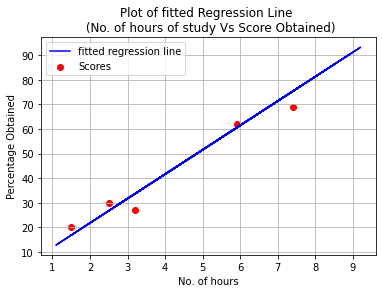

In [14]:
#plotting regression line on test data

plt.scatter(X_test,Y_test,color="Red" , label = "Scores", )
plt.title("Plot of fitted Regression Line \n (No. of hours of study Vs Score Obtained)")
plt.xlabel("No. of hours")
plt.ylabel("Percentage Obtained")
plt.plot(X, fitted_RL, color="Blue", label="fitted regression line")
plt.grid(True)
plt.legend()
plt.show()

**MAKING PREDICTIONS**

In [15]:
Y_predicted=Regression_model.predict(X_test)

**Computing actual and predicted scores**

In [16]:
#comparing actual and predicted  scores
df1=pd.DataFrame({'Actual':Y_test,'Predicted':Y_predicted})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


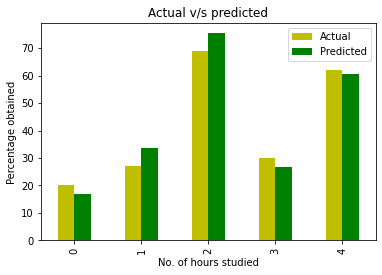

In [17]:
#comparison using bar graph
df1.plot(kind="bar", color=('y','g'))
plt.xlabel('No. of hours studied')
plt.ylabel('Percentage obtained')
plt.title("Actual v/s predicted")
plt.show()

**TESTING THE MODEL ACCURACY**

Now we will check the R squared value to check accuracy of model

In [18]:
#Checking R squared value
Y_true=[20,27,69,30,62]
Y_predicted=[16.884145,33.732261,75.357018,26.794801,60.491033]
r=r2_score(Y_true,Y_predicted)
print("R squared value ::", r)


R squared value :: 0.9454906872389663


In [19]:
import math
from sklearn.metrics import mean_squared_error

Y_true=[20,27,69,30,62]
Y_predicted=[16.884145,33.732261,75.357018,26.794801,60.491033]
rmse=math.sqrt(mean_squared_error(Y_true,Y_true))
print("Root mean squared value ::", rmse)


Root mean squared value :: 0.0


Thus we get R Squared value= 0.94 and root mean squared error as 0. **This means 94.54% variation in dependent variable can be explained by this model i.e. Accuracy of the model= 94.54%**

**TESTING MODEL USING OWN DATA**

**TASK-  Suppose, if student studies for 9.25hrs per day then what will be the percentage of that student?**

In [20]:
no_of_hrs=9.25 #per day
pred_score=Regression_model.predict([[no_of_hrs]])
print("No of hrs studied:",no_of_hrs)
print("Predicted Percentage:",pred_score[0])

No of hrs studied: 9.25
Predicted Percentage: 93.69173248737538


**EVALUATING THE MODEL**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))


Mean Absolute Error: 4.183859999999999


If **Mean absolute error <10** the that **model is considered as best fit.**


**CONCLUSION**

1. We fitted **a linear regression model** on data set with **No.of hours of study of student as dependent variable and 
percentage obtained as independent variable.**

2. **The model accuracy is 94.54% an it is a best fit model.**

3. Using this model we predicted that **if a student studies for 9.25 hrs per day his percentage score wiil be 93.69%.**


# THANK YOU !!